22AIE313 – Computer Vision and Image Processing

Assignment 1

# Objective:

Design a robust image processing pipeline to detect and segment objects in noisy images, using a
combination of pixel processing, filtering, and segmentation techniques.

 ## Problem Selection & Dataset Preparation



In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset"

if os.path.exists(dataset_path):
    print("Dataset found!")
else:
    print("Dataset path is incorrect. Please check the path.")

Dataset found!


In [ ]:
import os

# Function to count images in each folder
def count_images(base_path):
    categories = os.listdir(base_path)
    image_counts = {}

    for category in categories:
        category_path = os.path.join(base_path, category)
        num_images = len(os.listdir(category_path))
        image_counts[category] = num_images

    return image_counts

# Count images in Training and Testing datasets
train_path = os.path.join(dataset_path, "Training")
test_path = os.path.join(dataset_path, "Testing")

train_counts = count_images(train_path)
test_counts = count_images(test_path)

print("\n--- Training Set Image Counts ---")
for category, count in train_counts.items():
    print(f"{category}: {count} images")

print("\n--- Testing Set Image Counts ---")
for category, count in test_counts.items():
    print(f"{category}: {count} images")


--- Training Set Image Counts ---
meningioma: 1339 images
notumor: 1595 images
pituitary: 1457 images
glioma: 1322 images

--- Testing Set Image Counts ---
notumor: 405 images
meningioma: 306 images
pituitary: 300 images
glioma: 300 images


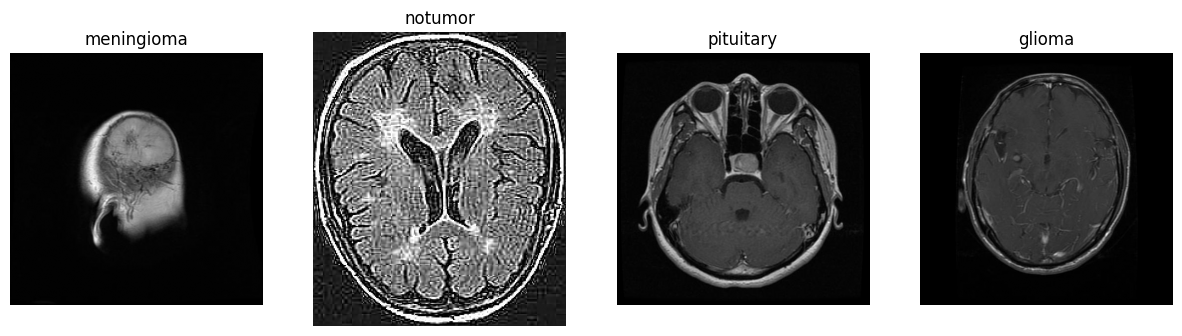

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

# Function to show sample images
def show_sample_images(base_path):
    categories = os.listdir(base_path)
    fig, axes = plt.subplots(1, len(categories), figsize=(15, 5))

    for i, category in enumerate(categories):
        category_path = os.path.join(base_path, category)
        sample_image = random.choice(os.listdir(category_path))
        image_path = os.path.join(category_path, sample_image)

        # Load and display image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(category)
        axes[i].axis("off")

    plt.show()

# Show sample images from training set
show_sample_images(train_path)

🔹 Sample Image Category: glioma
📊 Mean Pixel Intensity: 31.39
📈 Standard Deviation (Noise Level): 43.35


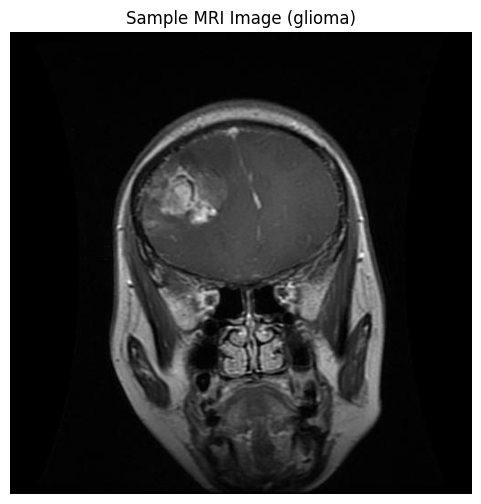

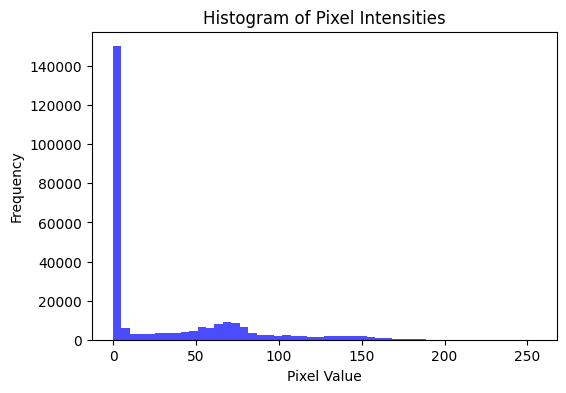

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Load a sample image from one category (e.g., glioma)
sample_category = "glioma"  # Change to other categories if needed
sample_image_path = "/content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset/Training/glioma/Tr-glTr_0000.jpg"

# Read image in grayscale
image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# Compute noise statistics
mean_intensity = np.mean(image)
std_intensity = np.std(image)  # Higher std → More noise

print(f"🔹 Sample Image Category: {sample_category}")
print(f"📊 Mean Pixel Intensity: {mean_intensity:.2f}")
print(f"📈 Standard Deviation (Noise Level): {std_intensity:.2f}")

# Display the image
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.title(f"Sample MRI Image ({sample_category})")
plt.axis("off")
plt.show()

# Plot histogram of pixel intensities
plt.figure(figsize=(6,4))
plt.hist(image.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

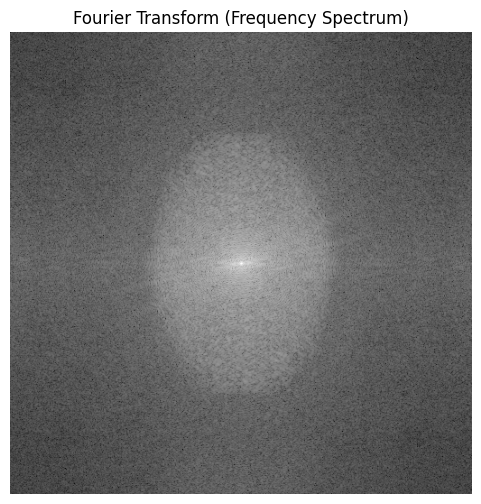

In [ ]:
# Apply Fourier Transform (for Motion Artifacts detection)
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))

# Display Frequency Spectrum
plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Fourier Transform (Frequency Spectrum)")
plt.axis("off")
plt.show()

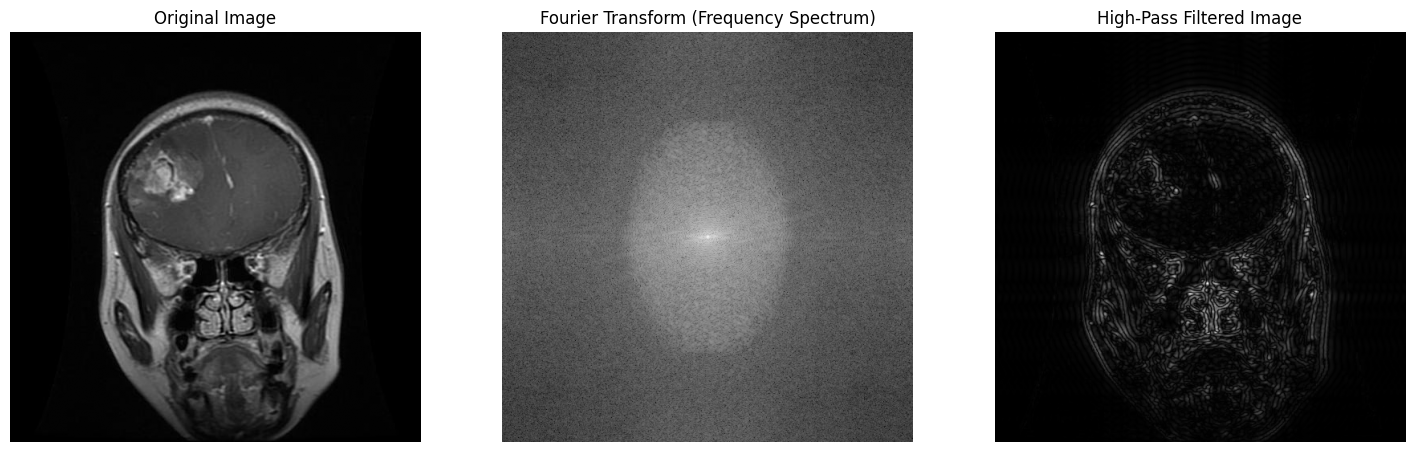

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# -------------------- APPLY FOURIER TRANSFORM --------------------
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)  # Center FFT
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted) + 1)  # Avoid log(0)

# -------------------- HIGH-PASS FILTERING --------------------
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center coordinates

# Create a high-pass mask (blocks low frequencies)
hp_filter = np.ones((rows, cols), np.uint8)
r = 30  # Radius of low-frequency removal (adjust as needed)
hp_filter[crow - r:crow + r, ccol - r:ccol + r] = 0  # Zero out low frequencies

# Apply the high-pass filter
filtered_fft = f_transform_shifted * hp_filter

# Inverse Fourier Transform to reconstruct the filtered image
f_ishift = np.fft.ifftshift(filtered_fft)
filtered_image = np.fft.ifft2(f_ishift)
filtered_image = np.abs(filtered_image)

# -------------------- DISPLAY RESULTS --------------------
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(magnitude_spectrum, cmap='gray')
ax[1].set_title("Fourier Transform (Frequency Spectrum)")
ax[1].axis("off")

ax[2].imshow(filtered_image, cmap='gray')
ax[2].set_title("High-Pass Filtered Image")
ax[2].axis("off")

plt.show()

## Noise Reduction

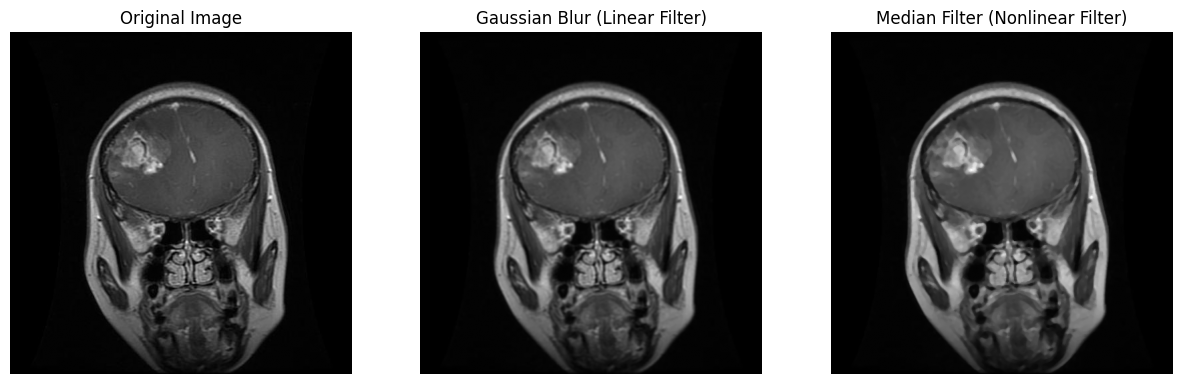

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Load a sample MRI image from the dataset
sample_category = "glioma"  # Change category if needed
sample_image_path = "/content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset/Training/glioma/Tr-glTr_0000.jpg"

# Read image in grayscale
image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur (Linear Filtering)
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Median Filter (Nonlinear Filtering)
median_blur = cv2.medianBlur(image, 5)

# Display Original and Filtered Images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(gaussian_blur, cmap='gray')
ax[1].set_title("Gaussian Blur (Linear Filter)")
ax[1].axis("off")

ax[2].imshow(median_blur, cmap='gray')
ax[2].set_title("Median Filter (Nonlinear Filter)")
ax[2].axis("off")

plt.show()

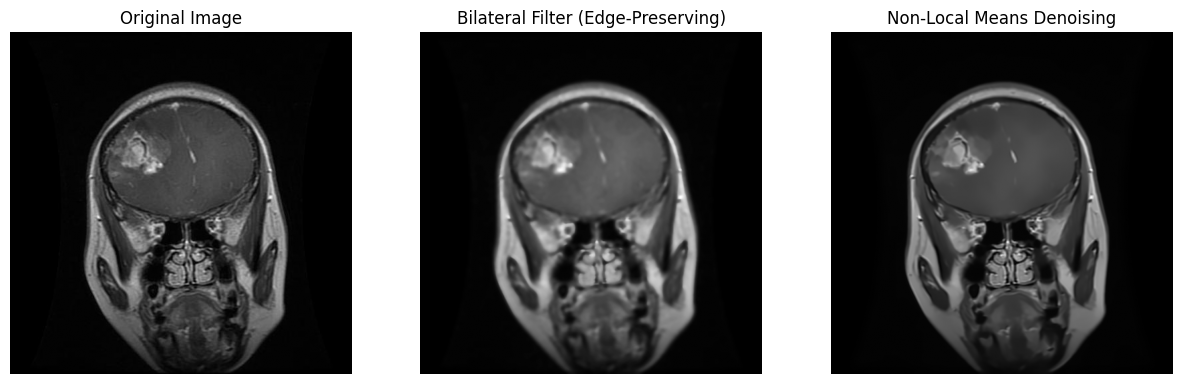

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Load a sample MRI image from the dataset
sample_category = "glioma"  # Change category if needed
sample_image_path = "/content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset/Training/glioma/Tr-glTr_0000.jpg"

# Read image in grayscale
image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# Apply Bilateral Filter (Edge-Preserving)
bilateral_filtered = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Apply Non-Local Means Denoising
nlm_filtered = cv2.fastNlMeansDenoising(image, h=10, templateWindowSize=7, searchWindowSize=21)

# Display Original and Filtered Images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(bilateral_filtered, cmap='gray')
ax[1].set_title("Bilateral Filter (Edge-Preserving)")
ax[1].axis("off")

ax[2].imshow(nlm_filtered, cmap='gray')
ax[2].set_title("Non-Local Means Denoising")
ax[2].axis("off")

plt.show()

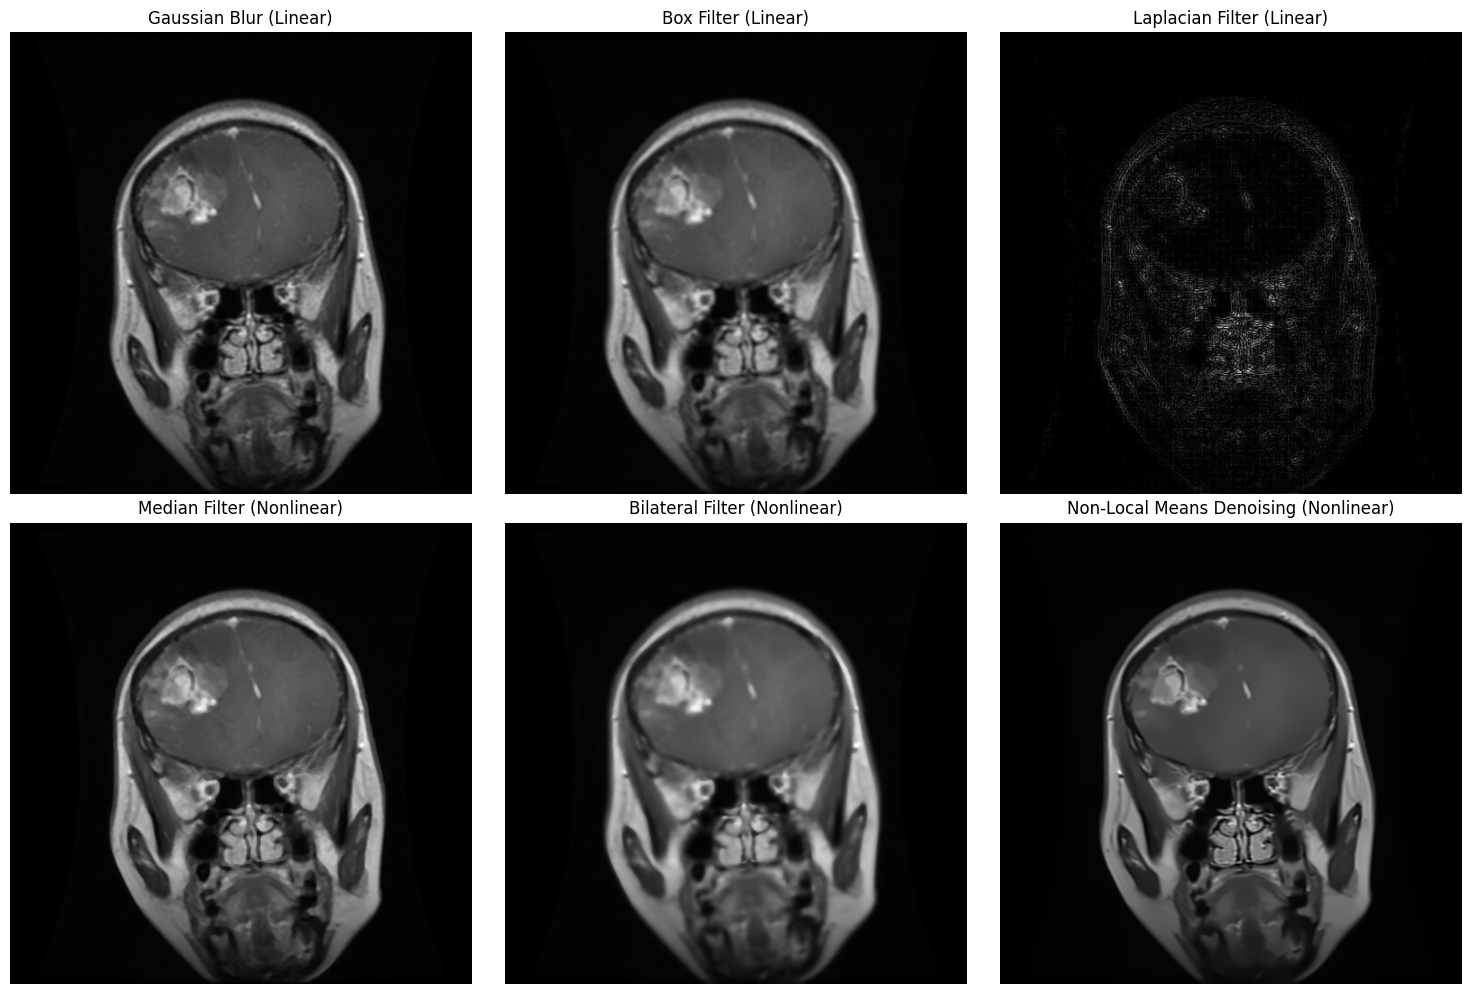

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
sample_image_path = "/content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset/Training/glioma/Tr-glTr_0000.jpg"
image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# Apply Filters
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)  # Linear
box_filter = cv2.boxFilter(image, -1, (5, 5))  # Linear
laplacian_filter = cv2.Laplacian(image, cv2.CV_64F)
laplacian_filter = cv2.convertScaleAbs(laplacian_filter)  # Convert back to 8-bit

median_blur = cv2.medianBlur(image, 5)  # Nonlinear
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)  # Nonlinear
nl_means_denoising = cv2.fastNlMeansDenoising(image, None, 10, 7, 21)  # Nonlinear

# Display 3x3 grid (excluding original image)
filtered_images = [
    (gaussian_blur, "Gaussian Blur (Linear)"),
    (box_filter, "Box Filter (Linear)"),
    (laplacian_filter, "Laplacian Filter (Linear)"),
    (median_blur, "Median Filter (Nonlinear)"),
    (bilateral_filter, "Bilateral Filter (Nonlinear)"),
    (nl_means_denoising, "Non-Local Means Denoising (Nonlinear)")
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 3x3 grid (2 rows, 3 columns)

for ax, (filtered_image, title) in zip(axes.flat, filtered_images):
    ax.imshow(filtered_image, cmap='gray')
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()

## Segmentation and Object Extraction

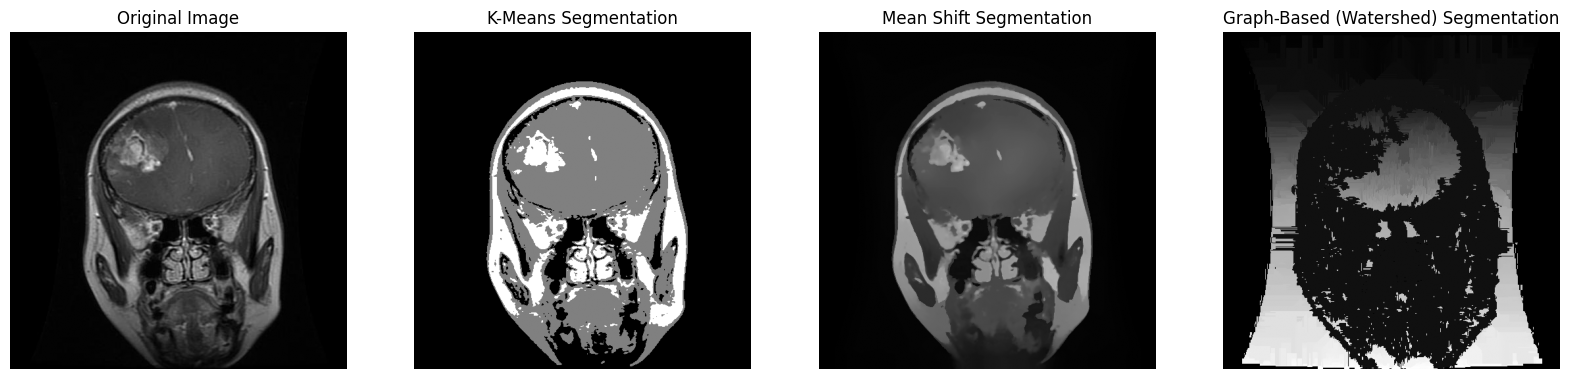

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy.ndimage import label, distance_transform_edt

# Load a sample MRI image from the dataset
sample_category = "glioma"  # Change category if needed
sample_image_path = "/content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset/Training/glioma/Tr-glTr_0000.jpg"

# Read image in grayscale
image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# -------------------- K-MEANS SEGMENTATION --------------------
# Convert image to 1D array for K-Means clustering
Z = image.reshape((-1, 1))
Z = np.float32(Z)

# Define criteria for K-Means (max 10 iterations, epsilon=1.0)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3  # Number of clusters
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert labels back to image
kmeans_segmented = labels.reshape(image.shape)

# -------------------- MEAN SHIFT SEGMENTATION --------------------
# Apply Gaussian Blur before Mean Shift for better results
blurred = cv2.GaussianBlur(image, (5,5), 0)
mean_shift = cv2.pyrMeanShiftFiltering(cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR), 20, 40)
mean_shift_gray = cv2.cvtColor(mean_shift, cv2.COLOR_BGR2GRAY)

# -------------------- WATERSHED (GRAPH-BASED) SEGMENTATION --------------------
# Compute the distance transform
distance = distance_transform_edt(image)

# Identify local maxima
local_max = peak_local_max(distance, labels=image)

# Convert coordinates to a mask
mask = np.zeros_like(image, dtype=bool)
mask[tuple(local_max.T)] = True

# Label local maxima as markers
markers, _ = label(mask)

# Apply Watershed algorithm
watershed_segmented = watershed(-distance, markers, mask=image)

# -------------------- DISPLAY RESULTS --------------------
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(kmeans_segmented, cmap='gray')
ax[1].set_title("K-Means Segmentation")
ax[1].axis("off")

ax[2].imshow(mean_shift_gray, cmap='gray')
ax[2].set_title("Mean Shift Segmentation")
ax[2].axis("off")

ax[3].imshow(watershed_segmented, cmap='gray')
ax[3].set_title("Graph-Based (Watershed) Segmentation")
ax[3].axis("off")

plt.show()

In [ ]:
# Save K-Means segmentation result
cv2.imwrite("kmeans_segmentation.png", kmeans_segmented)

# Save Mean Shift segmentation result
cv2.imwrite("meanshift_segmentation.png", mean_shift_gray)

print("K-Means and Mean Shift segmentations saved as PNG.")

K-Means and Mean Shift segmentations saved as PNG.


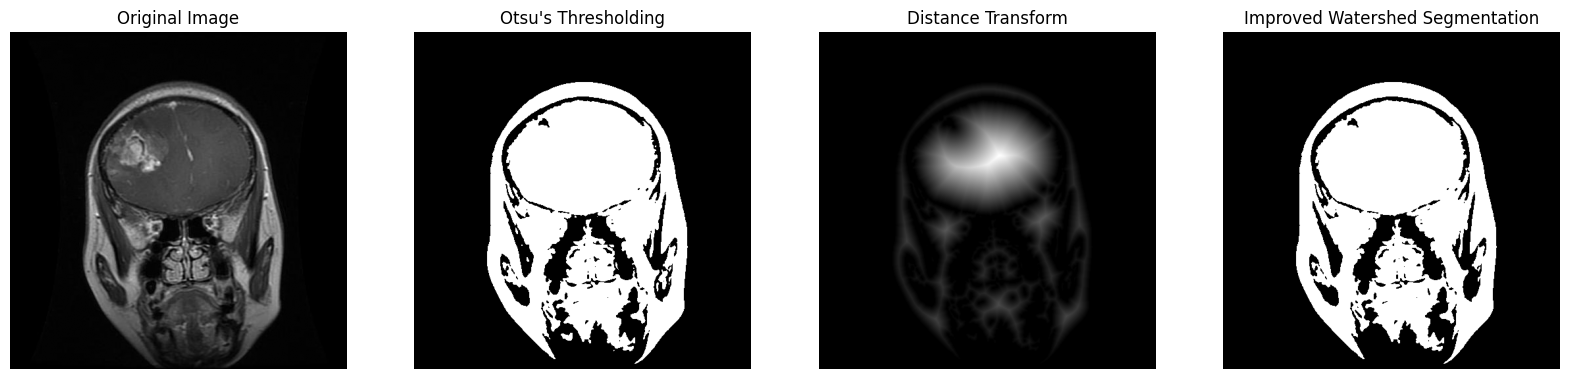

True

In [ ]:
# Improved Watershed Segmentation

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy.ndimage import label, distance_transform_edt
from skimage.morphology import remove_small_objects

# Load a sample MRI image
sample_category = "glioma"  # Change category if needed
sample_image_path = "/content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset/Training/glioma/Tr-glTr_0000.jpg"

# Read image in grayscale
image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# -------------------- PREPROCESSING --------------------

# Apply Gaussian Blurring to remove noise
blurred = cv2.GaussianBlur(image, (5,5), 0)

# Apply Otsu's thresholding
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Compute the distance transform
distance = distance_transform_edt(binary)

# Normalize the distance transform for better visualization
distance = (distance / distance.max() * 255).astype(np.uint8)

# Use Otsu's threshold again to get sure foreground regions
_, sure_fg = cv2.threshold(distance, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphological operations to refine sure foreground
kernel = np.ones((3,3), np.uint8)
sure_fg = cv2.morphologyEx(sure_fg, cv2.MORPH_OPEN, kernel, iterations=2)

# Extract sure background (dilating the thresholded binary image)
sure_bg = cv2.dilate(binary, kernel, iterations=3)

# Unknown region: sure background - sure foreground
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers (ensure background is 1 and foreground starts from 2)
markers, _ = label(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0  # Mark unknown regions as 0

# -------------------- WATERSHED SEGMENTATION --------------------

# Apply Watershed
watershed_segmented = watershed(-distance, markers, mask=binary)

# Remove small noisy regions
watershed_segmented = remove_small_objects(watershed_segmented.astype(bool), min_size=200).astype(np.uint8) * 255

# -------------------- DISPLAY RESULTS --------------------
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(binary, cmap='gray')
ax[1].set_title("Otsu's Thresholding")
ax[1].axis("off")

ax[2].imshow(distance, cmap='gray')
ax[2].set_title("Distance Transform")
ax[2].axis("off")

ax[3].imshow(watershed_segmented, cmap='gray')
ax[3].set_title("Improved Watershed Segmentation")
ax[3].axis("off")

plt.show()

# Save result
cv2.imwrite("improved_watershed_segmented.png", watershed_segmented)

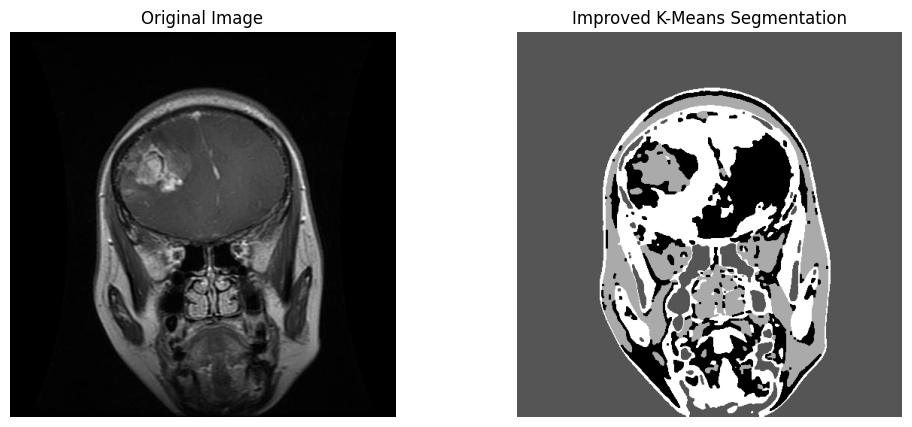

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load MRI image in grayscale
sample_image_path = "/content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset/Training/glioma/Tr-glTr_0000.jpg"
image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# -------------------- PREPROCESSING --------------------
# Apply CLAHE (Adaptive Histogram Equalization) for better contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image)

# Apply Bilateral Filter to remove noise while preserving edges
image_filtered = cv2.bilateralFilter(image_clahe, 9, 75, 75)

# -------------------- IMPROVED K-MEANS SEGMENTATION --------------------
# Convert image to 1D array for K-Means
Z = image_filtered.reshape((-1, 1))
Z = np.float32(Z)

# Define criteria and perform K-Means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4  # Increased clusters for better segmentation
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

# Reshape labels back to image
kmeans_segmented = labels.reshape(image.shape)

# Apply Morphological Closing to refine tumor region
kernel = np.ones((3, 3), np.uint8)
kmeans_segmented_morph = cv2.morphologyEx(kmeans_segmented.astype(np.uint8), cv2.MORPH_CLOSE, kernel)

# -------------------- DISPLAY RESULTS --------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(kmeans_segmented_morph, cmap='gray')
ax[1].set_title("Improved K-Means Segmentation")
ax[1].axis("off")

plt.show()

# Save result
cv2.imwrite("improved_kmeans_segmented.png", kmeans_segmented_morph)

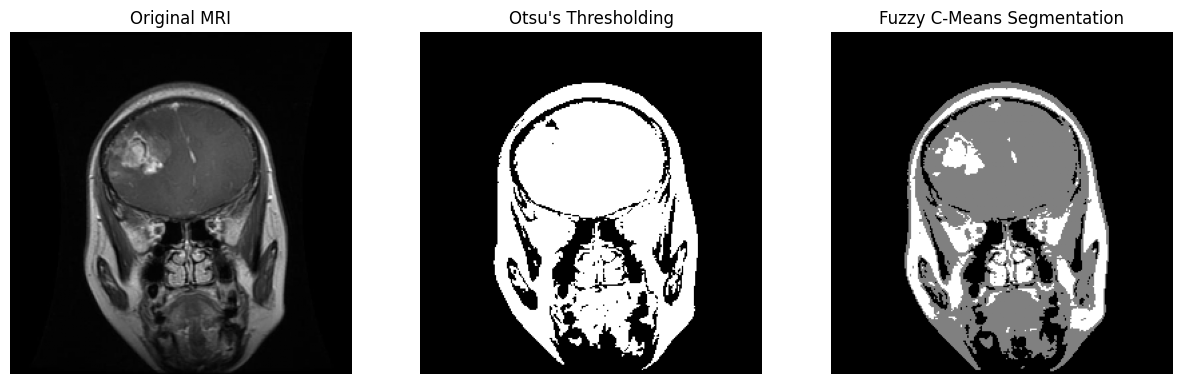

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from fcmeans import FCM

# Load & Preprocess MRI Image
image_path = "/content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset/Training/glioma/Tr-glTr_0000.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (256, 256))  # Resize for processing

# -------------------- OTSU'S THRESHOLDING --------------------
otsu_thresh = threshold_otsu(image_resized)
otsu_segmented = (image_resized > otsu_thresh).astype(np.uint8) * 255  # Binary mask

# -------------------- FUZZY C-MEANS CLUSTERING --------------------
# Reshape for clustering
image_flattened = image_resized.reshape(-1, 1)

# Apply FCM
fcm = FCM(n_clusters=3)  # Adjust clusters based on image complexity
fcm.fit(image_flattened)
fcm_labels = fcm.predict(image_flattened)

# Reshape labels back to image
fcm_segmented = fcm_labels.reshape(image_resized.shape) * 85  # Scale for visualization

# -------------------- DISPLAY RESULTS --------------------
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image_resized, cmap='gray')
ax[0].set_title("Original MRI")
ax[0].axis("off")

ax[1].imshow(otsu_segmented, cmap='gray')
ax[1].set_title("Otsu's Thresholding")
ax[1].axis("off")

ax[2].imshow(fcm_segmented, cmap='gray')
ax[2].set_title("Fuzzy C-Means Segmentation")
ax[2].axis("off")

plt.show()

cv2.imwrite("fcm_segmented.png", fcm_segmented)
cv2.imwrite("otsu_segmented.png", otsu_segmented)

## Region-Based Processing

In [ ]:
cv2.imwrite("segmented_tumor.png", watershed_segmented)

True

Loaded Image Shape: (512, 512)


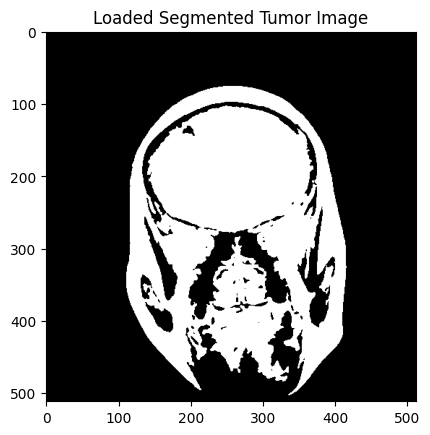

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Check if the image exists
file_path = "segmented_tumor.png"
if not os.path.exists(file_path):
    print("Error: Segmented image file not found!")
else:
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    # Debugging: Check if the image is loaded properly
    print("Loaded Image Shape:", image.shape)
    plt.imshow(image, cmap="gray")
    plt.title("Loaded Segmented Tumor Image")
    plt.show()

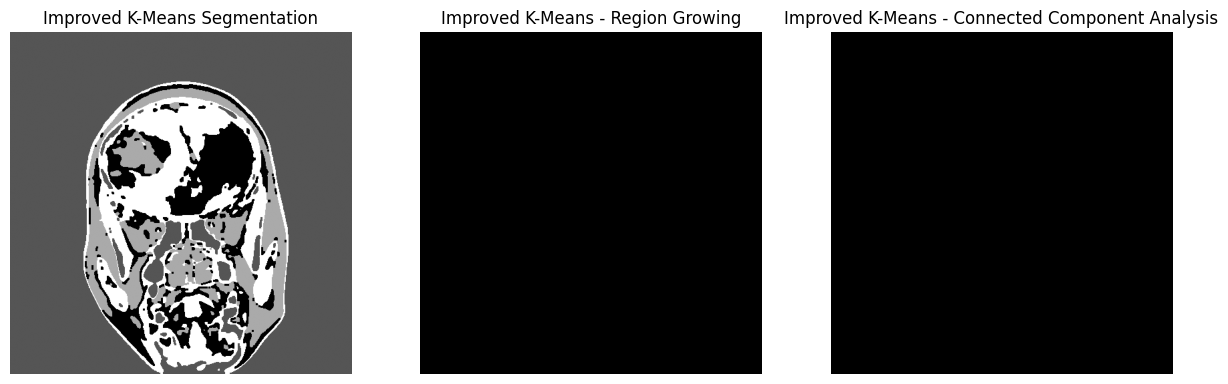

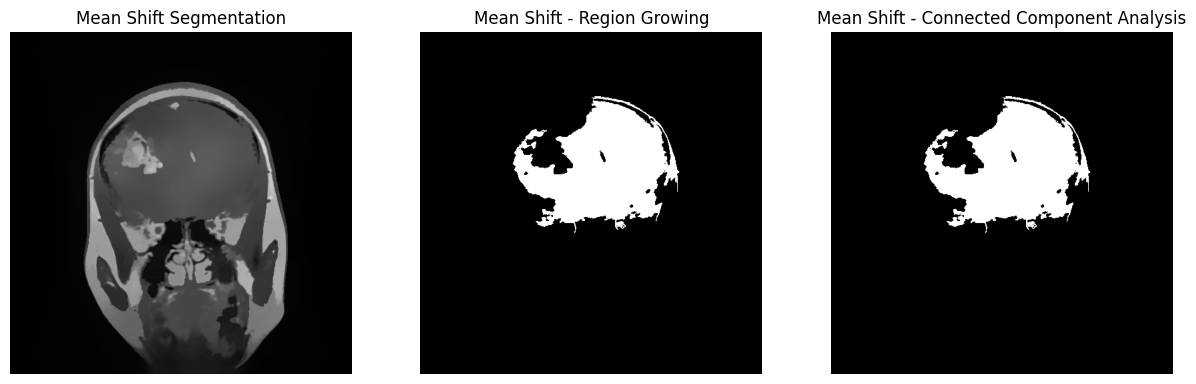

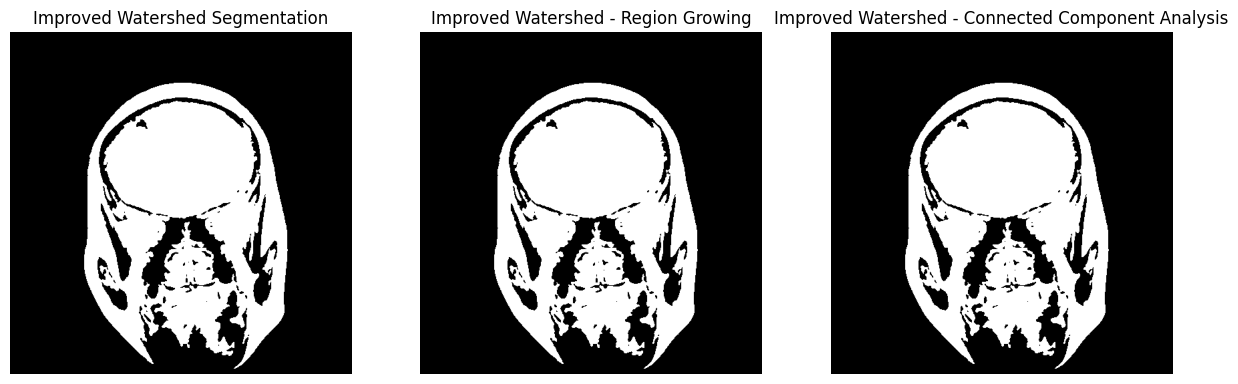

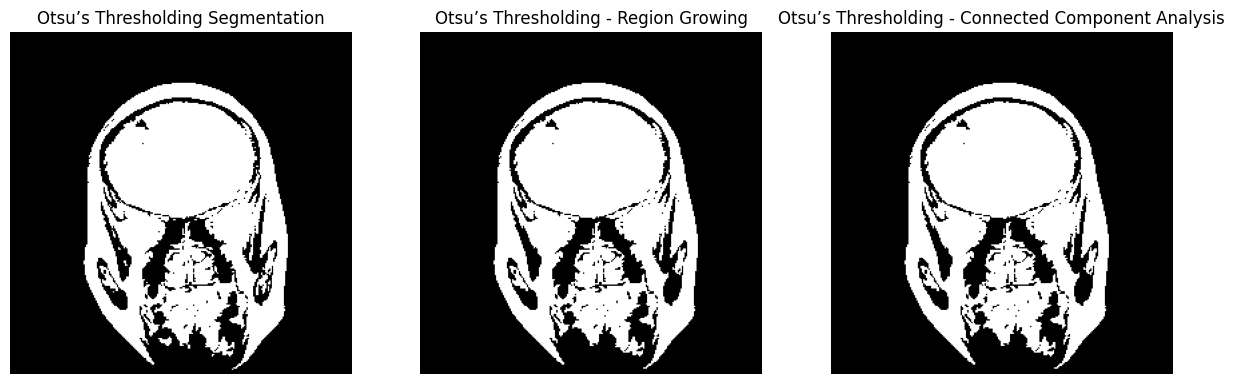

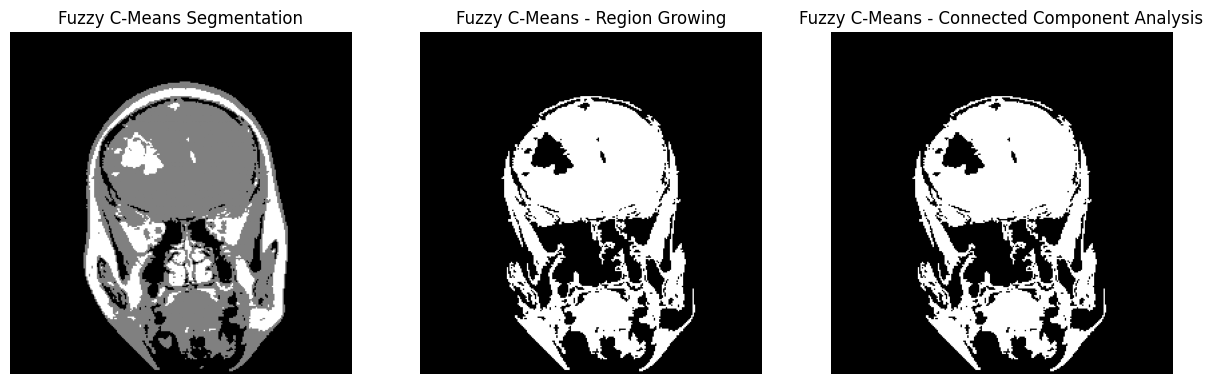

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for Region Growing Algorithm
def region_growing(image, seed_point, threshold=10):
    h, w = image.shape
    segmented = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=np.uint8)

    stack = [seed_point]
    seed_intensity = image[seed_point]

    while stack:
        x, y = stack.pop()
        if visited[x, y] == 0 and abs(int(image[x, y]) - int(seed_intensity)) < threshold:
            segmented[x, y] = 255  # Mark as segmented
            visited[x, y] = 1  # Mark as visited

            # Check neighbors
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < h and 0 <= ny < w:
                    stack.append((nx, ny))

    return segmented

# Function for Connected Component Analysis (CCA)
def apply_cca(image):
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=8)

    # Remove small components (noise)
    min_area = 500  # Adjust this threshold
    filtered_image = np.zeros_like(image, dtype=np.uint8)

    for i in range(1, num_labels):  # Skip background (label 0)
        if stats[i, cv2.CC_STAT_AREA] > min_area:
            filtered_image[labels == i] = 255  # Retain large components

    return filtered_image

# Dictionary of segmentation methods and their corresponding file paths
segmentation_methods = {
    "Improved K-Means": "/content/improved_kmeans_segmented.png",
    "Mean Shift": "/content/meanshift_segmentation.png",
    "Improved Watershed": "/content/improved_watershed_segmented.png",
    "Otsu’s Thresholding": "/content/otsu_segmented.png",
    "Fuzzy C-Means": "/content/fcm_segmented.png"
}

# Process each segmented image separately
for method, path in segmentation_methods.items():
    # Load segmented image
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Apply Region Growing (using the center pixel as seed)
    seed = (image.shape[0] // 2, image.shape[1] // 2)
    region_grown = region_growing(image, seed)

    # Apply Connected Component Analysis
    cca_result = apply_cca(region_grown)

    # Display results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(image, cmap='gray')
    axes[0].set_title(f"{method} Segmentation")
    axes[0].axis("off")

    axes[1].imshow(region_grown, cmap='gray')
    axes[1].set_title(f"{method} - Region Growing")
    axes[1].axis("off")

    axes[2].imshow(cca_result, cmap='gray')
    axes[2].set_title(f"{method} - Connected Component Analysis")
    axes[2].axis("off")

    plt.show()

## Final Evaluation & Report

In [ ]:
import cv2
import numpy as np

# Save the predicted segmentation mask
cv2.imwrite("/content/predicted.png", watershed_segmented)
print("✅ Predicted segmentation mask saved as 'predicted.png'.")

✅ Predicted segmentation mask saved as 'predicted.png'.


✅ Image loaded successfully.


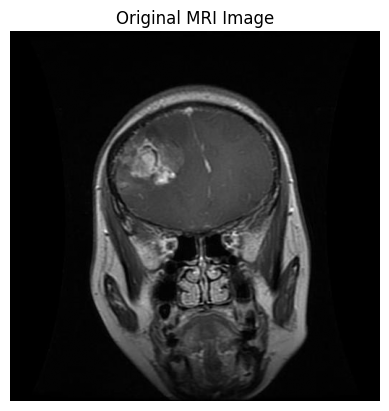

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the MRI image in grayscale
image_path = "/content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset/Training/glioma/Tr-glTr_0000.jpg"
original_image = cv2.imread(image_path, 0)  # Load as grayscale

# Check if the image is loaded
if original_image is None:
    print("❌ Error: Image not found or cannot be loaded. Check file path and format.")
else:
    print("✅ Image loaded successfully.")
    plt.imshow(original_image, cmap='gray')
    plt.title("Original MRI Image")
    plt.axis("off")
    plt.show()

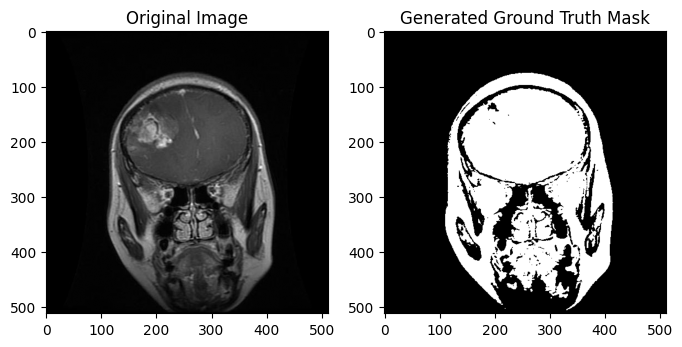

✅ Ground truth saved as 'ground_truth.png'.


In [ ]:
# Apply Otsu's Thresholding to generate a binary mask
if original_image is not None:
    _, ground_truth_mask = cv2.threshold(original_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display results
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1), plt.imshow(original_image, cmap='gray'), plt.title("Original Image")
    plt.subplot(1, 2, 2), plt.imshow(ground_truth_mask, cmap='gray'), plt.title("Generated Ground Truth Mask")
    plt.show()

    # Save the generated ground truth
    cv2.imwrite("/content/ground_truth.png", ground_truth_mask)
    print("✅ Ground truth saved as 'ground_truth.png'.")
else:
    print("❌ Error: Thresholding failed because the image was not loaded.")

In [ ]:
import os

# Define paths
gt_path = "/content/ground_truth.png"       # Ground truth mask
pred_path = "/content/predicted.png"        # Predicted segmentation mask

# Check if both files exist
if os.path.exists(gt_path) and os.path.exists(pred_path):
    print("✅ Both ground truth and predicted masks found.")
else:
    print("❌ Error: One or both masks are missing. Check file paths.")

✅ Both ground truth and predicted masks found.


In [ ]:
import cv2
import numpy as np

def compute_metrics(ground_truth, predicted):
    # Convert images to binary (0 or 1)
    ground_truth = (ground_truth > 0).astype(np.uint8)
    predicted = (predicted > 0).astype(np.uint8)

    # Compute Intersection and Union
    intersection = np.logical_and(ground_truth, predicted).sum()
    union = np.logical_or(ground_truth, predicted).sum()
    iou = intersection / union if union != 0 else 0

    # Compute Dice Coefficient
    dice = (2 * intersection) / (ground_truth.sum() + predicted.sum()) if (ground_truth.sum() + predicted.sum()) != 0 else 0

    # Compute Pixel Accuracy
    pixel_accuracy = np.mean(ground_truth == predicted)

    return iou, dice, pixel_accuracy

# Load the masks
ground_truth = cv2.imread(gt_path, 0)   # Read in grayscale
predicted = cv2.imread(pred_path, 0)    # Read in grayscale

# Check if images loaded correctly
if ground_truth is None or predicted is None:
    print("❌ Error: One or both masks could not be loaded. Check file paths.")
else:
    # Compute metrics
    iou, dice, pixel_acc = compute_metrics(ground_truth, predicted)
    print(f"IoU: {iou:.4f}")
    print(f"Dice Coefficient: {dice:.4f}")
    print(f"Pixel Accuracy: {pixel_acc:.4f}")

IoU: 0.9589
Dice Coefficient: 0.9790
Pixel Accuracy: 0.9869


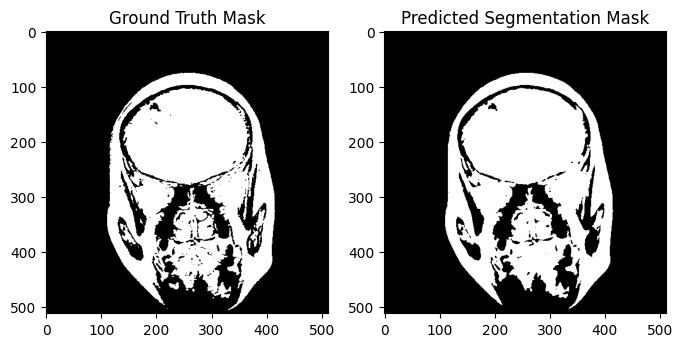

In [ ]:
import matplotlib.pyplot as plt

# Display the ground truth and predicted mask
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(ground_truth, cmap='gray')
plt.title("Ground Truth Mask")

plt.subplot(1, 2, 2)
plt.imshow(predicted, cmap='gray')
plt.title("Predicted Segmentation Mask")

plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

def compute_metrics(ground_truth, predicted):
    # Convert images to binary (0 or 1)
    ground_truth = (ground_truth > 0).astype(np.uint8)
    predicted = (predicted > 0).astype(np.uint8)

    # Flatten images for metric calculations
    gt_flat = ground_truth.flatten()
    pred_flat = predicted.flatten()

    # Compute Intersection and Union
    intersection = np.logical_and(ground_truth, predicted).sum()
    union = np.logical_or(ground_truth, predicted).sum()
    iou = intersection / union if union != 0 else 0

    # Compute Dice Coefficient
    dice = (2 * intersection) / (ground_truth.sum() + predicted.sum()) if (ground_truth.sum() + predicted.sum()) != 0 else 0

    # Compute Pixel Accuracy
    pixel_accuracy = np.mean(ground_truth == predicted)

    # Compute Precision, Recall, and F1 Score
    precision = precision_score(gt_flat, pred_flat, zero_division=1)
    recall = recall_score(gt_flat, pred_flat, zero_division=1)
    f1 = f1_score(gt_flat, pred_flat, zero_division=1)

    return iou, dice, pixel_accuracy, precision, recall, f1

# Load the masks
gt_path = "/content/ground_truth.png"
pred_path = "/content/predicted.png"

ground_truth = cv2.imread(gt_path, 0)  # Load in grayscale
predicted = cv2.imread(pred_path, 0)   # Load in grayscale

# Check if images loaded correctly
if ground_truth is None or predicted is None:
    print("❌ Error: One or both masks could not be loaded. Check file paths.")
else:
    # Compute all metrics
    iou, dice, pixel_acc, precision, recall, f1 = compute_metrics(ground_truth, predicted)

    # Display results
    print(f"IoU: {iou:.4f}")
    print(f"Dice Coefficient: {dice:.4f}")
    print(f"Pixel Accuracy: {pixel_acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

IoU: 0.9589
Dice Coefficient: 0.9790
Pixel Accuracy: 0.9869
Precision: 0.9704
Recall: 0.9878
F1 Score: 0.9790


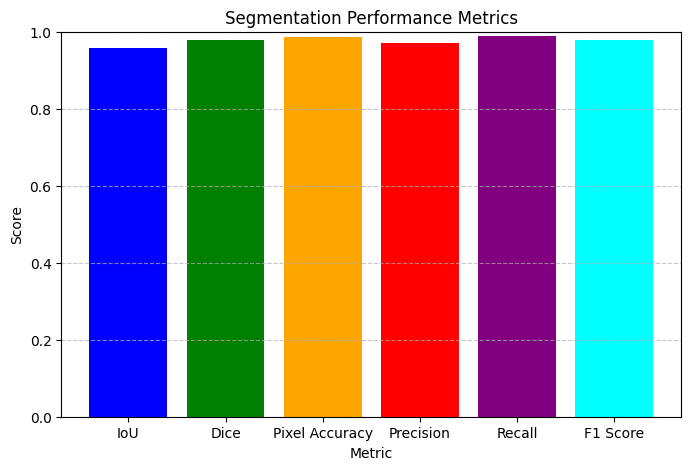

In [ ]:
import matplotlib.pyplot as plt

# Define metric names and values
metrics = ["IoU", "Dice", "Pixel Accuracy", "Precision", "Recall", "F1 Score"]
values = [iou, dice, pixel_acc, precision, recall, f1]

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=["blue", "green", "orange", "red", "purple", "cyan"])
plt.ylim(0, 1)  # Set y-axis range between 0 and 1
plt.title("Segmentation Performance Metrics")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

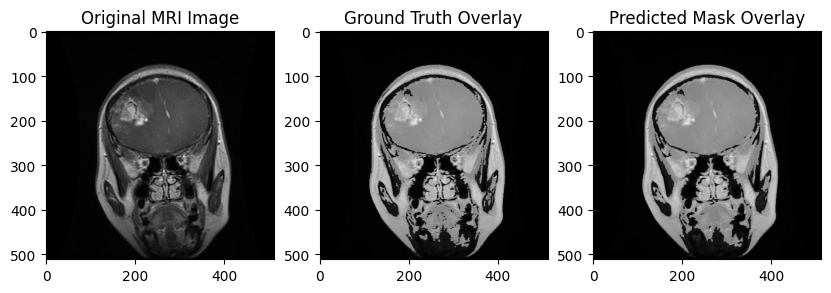

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load original MRI image
mri_image = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset/Training/glioma/Tr-glTr_0000.jpg", 0)

# Ensure all images have the same size
height, width = mri_image.shape[:2]

# Resize the segmentation masks to match the MRI image size
ground_truth_resized = cv2.resize(ground_truth, (width, height), interpolation=cv2.INTER_NEAREST)
predicted_resized = cv2.resize(predicted, (width, height), interpolation=cv2.INTER_NEAREST)

# Convert grayscale images to color (BGR) for overlaying
ground_truth_color = cv2.cvtColor(ground_truth_resized, cv2.COLOR_GRAY2BGR)
predicted_color = cv2.cvtColor(predicted_resized, cv2.COLOR_GRAY2BGR)
mri_color = cv2.cvtColor(mri_image, cv2.COLOR_GRAY2BGR)

# Overlay masks on the original image
overlay_gt = cv2.addWeighted(mri_color, 0.6, ground_truth_color, 0.4, 0)
overlay_pred = cv2.addWeighted(mri_color, 0.6, predicted_color, 0.4, 0)

# Display images
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(mri_color, cmap="gray")
plt.title("Original MRI Image")

plt.subplot(1, 3, 2)
plt.imshow(overlay_gt)
plt.title("Ground Truth Overlay")

plt.subplot(1, 3, 3)
plt.imshow(overlay_pred)
plt.title("Predicted Mask Overlay")

plt.show()

# Further Analysis and Performance Evaluation

✅ MRI Image Loaded.


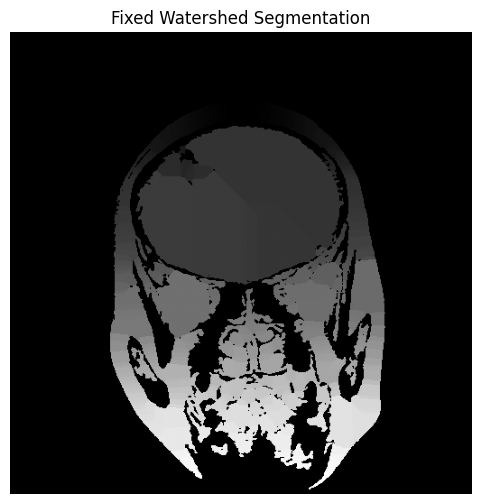

In [ ]:
import cv2
import numpy as np
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects
from scipy.ndimage import label
import matplotlib.pyplot as plt

# Load MRI Image
image_path = "/content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset/Training/glioma/Tr-glTr_0000.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure the image was loaded correctly
if original_image is None:
    print("❌ Error: Image not found. Check the path.")
else:
    print("✅ MRI Image Loaded.")

# 1️⃣ Apply Otsu's thresholding
thresh = threshold_otsu(original_image)
binary = original_image > thresh

# 2️⃣ Compute Distance Transform
distance = cv2.distanceTransform(np.uint8(binary), cv2.DIST_L2, 5)

# 3️⃣ Find local maxima
local_maxi = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary, num_peaks=1000)

# 4️⃣ Convert coordinates to binary mask (same shape as binary image)
maxima_mask = np.zeros_like(binary, dtype=bool)
maxima_mask[tuple(local_maxi.T)] = True

# 5️⃣ Label the markers correctly
markers, _ = label(maxima_mask)

# 6️⃣ Apply Watershed
watershed_segmented = watershed(-distance, markers, mask=binary)

# Display Watershed Segmentation
plt.figure(figsize=(6, 6))
plt.imshow(watershed_segmented, cmap="gray")
plt.title("Fixed Watershed Segmentation")
plt.axis("off")
plt.show()

✅ Image Loaded: /content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset/Training/glioma/Tr-glTr_0000.jpg
✅ Segmentation images saved successfully!


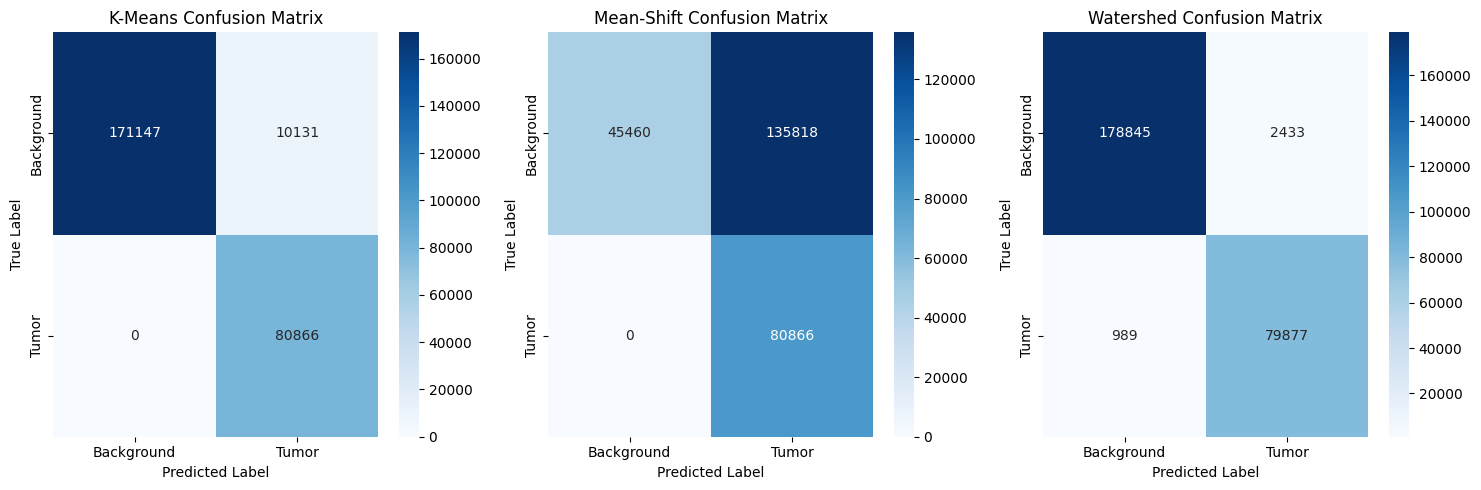

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy.ndimage import label, distance_transform_edt
from skimage.morphology import remove_small_objects
from sklearn.metrics import confusion_matrix

# Define image path (fixed)
image_path = "/content/drive/MyDrive/Colab_Notebooks/CV_Assignment/Dataset/Training/glioma/Tr-glTr_0000.jpg"

# Read image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError(f"❌ Error: Failed to load image from {image_path}")

print(f"✅ Image Loaded: {image_path}")

# -------------------- 1️⃣ K-MEANS SEGMENTATION --------------------
Z = image.reshape((-1, 1)).astype(np.float32)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3  # Number of clusters
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
kmeans_segmented = labels.reshape(image.shape)

# -------------------- 2️⃣ MEAN SHIFT SEGMENTATION --------------------
blurred = cv2.GaussianBlur(image, (5,5), 0)
mean_shift = cv2.pyrMeanShiftFiltering(cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR), 20, 40)
mean_shift_gray = cv2.cvtColor(mean_shift, cv2.COLOR_BGR2GRAY)

# -------------------- 3️⃣ IMPROVED WATERSHED SEGMENTATION --------------------
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
distance = distance_transform_edt(binary)
distance = (distance / distance.max() * 255).astype(np.uint8)
_, sure_fg = cv2.threshold(distance, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
sure_fg = cv2.morphologyEx(sure_fg, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(binary, kernel, iterations=3)
unknown = cv2.subtract(sure_bg, sure_fg)
markers, _ = label(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
watershed_segmented = watershed(-distance, markers, mask=binary)
watershed_segmented = remove_small_objects(watershed_segmented.astype(bool), min_size=200).astype(np.uint8) * 255

# -------------------- SAVE SEGMENTED IMAGES --------------------
cv2.imwrite("/content/kmeans.png", kmeans_segmented)
cv2.imwrite("/content/meanshift.png", mean_shift_gray)
cv2.imwrite("/content/watershed.png", watershed_segmented)
print("✅ Segmentation images saved successfully!")

# -------------------- 4️⃣ CONFUSION MATRIX --------------------
# Load ground truth (Assuming you have a corresponding ground truth image)
ground_truth_path = "/content/ground_truth.png"
ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)

if ground_truth is None:
    raise ValueError(f"❌ Error: Failed to load ground truth from {ground_truth_path}")

# Resize predictions to match ground truth (if needed)
target_size = (ground_truth.shape[1], ground_truth.shape[0])
kmeans_segmented = cv2.resize(kmeans_segmented, target_size)
mean_shift_gray = cv2.resize(mean_shift_gray, target_size)
watershed_segmented = cv2.resize(watershed_segmented, target_size)

# Convert to binary format
def binarize(image):
    return (image > 0).astype(np.uint8)

gt_bin = binarize(ground_truth)
kmeans_bin = binarize(kmeans_segmented)
meanshift_bin = binarize(mean_shift_gray)
watershed_bin = binarize(watershed_segmented)

# Compute Confusion Matrices
methods = {"K-Means": kmeans_bin, "Mean-Shift": meanshift_bin, "Watershed": watershed_bin}
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (method, pred_bin) in zip(axes, methods.items()):
    cm = confusion_matrix(gt_bin.flatten(), pred_bin.flatten(), labels=[0, 1])

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Background", "Tumor"], yticklabels=["Background", "Tumor"], ax=ax)
    ax.set_title(f"{method} Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Load ground truth
gt_path = "/content/ground_truth.png"
ground_truth = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

# Load segmented images
watershed_pred = cv2.imread("/content/watershed.png", cv2.IMREAD_GRAYSCALE)
kmeans_pred = cv2.imread("/content/kmeans.png", cv2.IMREAD_GRAYSCALE)
meanshift_pred = cv2.imread("/content/meanshift.png", cv2.IMREAD_GRAYSCALE)

# Ensure all images are loaded correctly
if ground_truth is None:
    raise ValueError("❌ Error: Ground truth image could not be loaded.")
if watershed_pred is None or kmeans_pred is None or meanshift_pred is None:
    raise ValueError("❌ Error: One or more segmented images could not be loaded.")

# Ensure all images have the same dimensions
h, w = ground_truth.shape
watershed_pred = cv2.resize(watershed_pred, (w, h))
kmeans_pred = cv2.resize(kmeans_pred, (w, h))
meanshift_pred = cv2.resize(meanshift_pred, (w, h))

# Function to compute metrics
def compute_metrics(ground_truth, predicted):
    # Convert images to binary
    gt_bin = (ground_truth > 127).astype(np.uint8)
    pred_bin = (predicted > 127).astype(np.uint8)

    # Flatten for sklearn metrics
    gt_flat = gt_bin.flatten()
    pred_flat = pred_bin.flatten()

    # Compute metrics
    intersection = np.logical_and(gt_bin, pred_bin).sum()
    union = np.logical_or(gt_bin, pred_bin).sum()
    iou = intersection / union if union != 0 else 0
    dice = (2 * intersection) / (gt_bin.sum() + pred_bin.sum()) if (gt_bin.sum() + pred_bin.sum()) != 0 else 0
    pixel_acc = np.mean(gt_bin == pred_bin)
    precision = precision_score(gt_flat, pred_flat, zero_division=1)
    recall = recall_score(gt_flat, pred_flat, zero_division=1)
    f1 = f1_score(gt_flat, pred_flat, zero_division=1)

    return iou, dice, pixel_acc, precision, recall, f1

# Compute metrics for all methods
methods = ["Watershed", "K-Means", "Mean-Shift"]
predictions = [watershed_pred, kmeans_pred, meanshift_pred]
results = {}

for method, pred in zip(methods, predictions):
    results[method] = compute_metrics(ground_truth, pred)

# Display metrics
for method, (iou, dice, pixel_acc, precision, recall, f1) in results.items():
    print(f"\n{method} Segmentation Metrics:")
    print(f"IoU: {iou:.4f}")
    print(f"Dice Coefficient: {dice:.4f}")
    print(f"Pixel Accuracy: {pixel_acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


Watershed Segmentation Metrics:
IoU: 0.9589
Dice Coefficient: 0.9790
Pixel Accuracy: 0.9869
Precision: 0.9704
Recall: 0.9878
F1 Score: 0.9790

K-Means Segmentation Metrics:
IoU: 0.0000
Dice Coefficient: 0.0000
Pixel Accuracy: 0.6915
Precision: 1.0000
Recall: 0.0000
F1 Score: 0.0000

Mean-Shift Segmentation Metrics:
IoU: 0.1761
Dice Coefficient: 0.2994
Pixel Accuracy: 0.7458
Precision: 1.0000
Recall: 0.1761
F1 Score: 0.2994


In [ ]:
import cv2
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Load ground truth
gt_path = "/content/ground_truth.png"
ground_truth = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

# Load segmented images
watershed_pred = cv2.imread("/content/watershed.png", cv2.IMREAD_GRAYSCALE)
kmeans_pred = cv2.imread("/content/kmeans.png", cv2.IMREAD_GRAYSCALE)
meanshift_pred = cv2.imread("/content/meanshift.png", cv2.IMREAD_GRAYSCALE)

# Function to compute metrics
def compute_metrics(ground_truth, predicted):
    gt_bin = (ground_truth > 0).astype(np.uint8)
    pred_bin = (predicted > 0).astype(np.uint8)

    gt_flat = gt_bin.flatten()
    pred_flat = pred_bin.flatten()

    intersection = np.logical_and(gt_bin, pred_bin).sum()
    union = np.logical_or(gt_bin, pred_bin).sum()
    iou = intersection / union if union != 0 else 0
    dice = (2 * intersection) / (gt_bin.sum() + pred_bin.sum()) if (gt_bin.sum() + pred_bin.sum()) != 0 else 0
    pixel_acc = np.mean(gt_bin == pred_bin)
    precision = precision_score(gt_flat, pred_flat, zero_division=1)
    recall = recall_score(gt_flat, pred_flat, zero_division=1)
    f1 = f1_score(gt_flat, pred_flat, zero_division=1)

    return iou, dice, pixel_acc, precision, recall, f1

# Compute metrics for all methods
methods = ["Watershed", "K-Means", "Mean-Shift"]
results = {}

for method, pred in zip(methods, [watershed_pred, kmeans_pred, meanshift_pred]):
    results[method] = compute_metrics(ground_truth, pred)

# Display metrics
for method, (iou, dice, pixel_acc, precision, recall, f1) in results.items():
    print(f"\n{method} Segmentation Metrics:")
    print(f"IoU: {iou:.4f}")
    print(f"Dice Coefficient: {dice:.4f}")
    print(f"Pixel Accuracy: {pixel_acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


Watershed Segmentation Metrics:
IoU: 0.9589
Dice Coefficient: 0.9790
Pixel Accuracy: 0.9869
Precision: 0.9704
Recall: 0.9878
F1 Score: 0.9790

K-Means Segmentation Metrics:
IoU: 0.8887
Dice Coefficient: 0.9411
Pixel Accuracy: 0.9614
Precision: 0.8887
Recall: 1.0000
F1 Score: 0.9411

Mean-Shift Segmentation Metrics:
IoU: 0.3732
Dice Coefficient: 0.5435
Pixel Accuracy: 0.4819
Precision: 0.3732
Recall: 1.0000
F1 Score: 0.5435


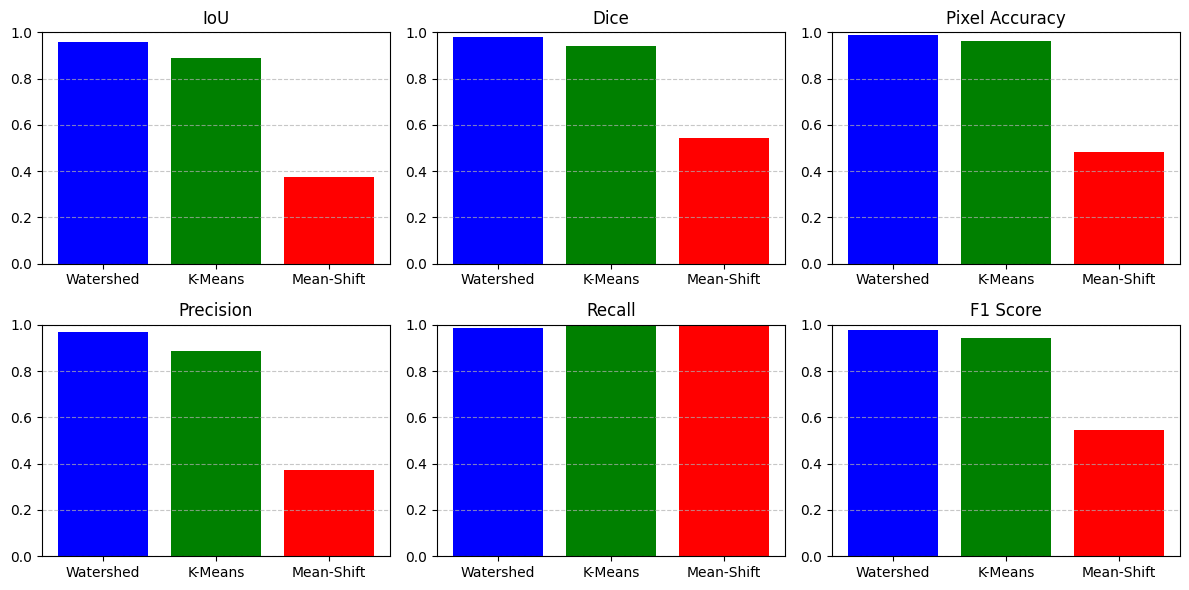

In [ ]:
import matplotlib.pyplot as plt

metrics = ["IoU", "Dice", "Pixel Accuracy", "Precision", "Recall", "F1 Score"]
scores = np.array([results[m] for m in methods])

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    plt.bar(methods, scores[:, i], color=["blue", "green", "red"])
    plt.ylim(0, 1)
    plt.title(metric)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

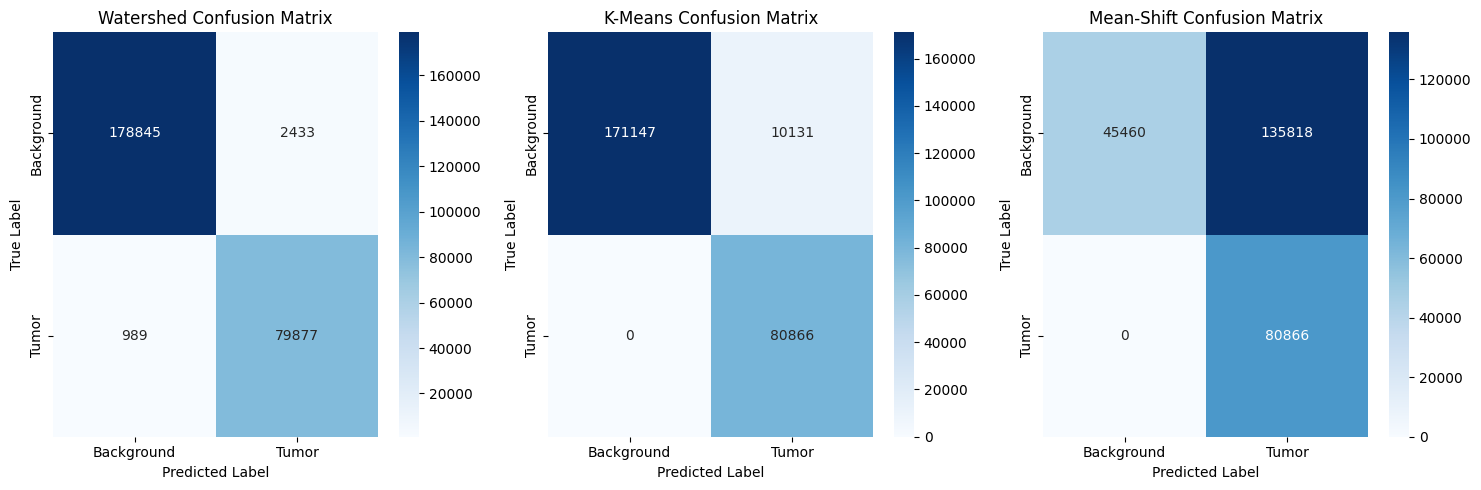

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load Ground Truth
gt_path = "/content/ground_truth.png"
ground_truth = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

# Load Segmentation Results
watershed_pred = cv2.imread("/content/watershed.png", cv2.IMREAD_GRAYSCALE)
kmeans_pred = cv2.imread("/content/kmeans.png", cv2.IMREAD_GRAYSCALE)
meanshift_pred = cv2.imread("/content/meanshift.png", cv2.IMREAD_GRAYSCALE)

# Ensure all images are loaded
if ground_truth is None or watershed_pred is None or kmeans_pred is None or meanshift_pred is None:
    raise ValueError("❌ Error: One or more images could not be loaded.")

# Resize segmentation results to match ground truth (if needed)
target_size = (ground_truth.shape[1], ground_truth.shape[0])
watershed_pred = cv2.resize(watershed_pred, target_size)
kmeans_pred = cv2.resize(kmeans_pred, target_size)
meanshift_pred = cv2.resize(meanshift_pred, target_size)

# Convert images to binary format (0=background, 1=foreground)
def binarize(image):
    return (image > 0).astype(np.uint8)

gt_bin = binarize(ground_truth)
watershed_bin = binarize(watershed_pred)
kmeans_bin = binarize(kmeans_pred)
meanshift_bin = binarize(meanshift_pred)

# Compute Confusion Matrices
methods = {"Watershed": watershed_bin, "K-Means": kmeans_bin, "Mean-Shift": meanshift_bin}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (method, pred_bin) in zip(axes, methods.items()):
    cm = confusion_matrix(gt_bin.flatten(), pred_bin.flatten(), labels=[0, 1])

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Background", "Tumor"], yticklabels=["Background", "Tumor"], ax=ax)
    ax.set_title(f"{method} Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()